In [59]:
from utils import ext_transforms as et
from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
import numpy as np
import torch
import cv2 as cv

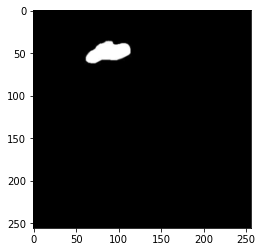

In [62]:
sample_mask = Image.open('/data1/sdi/datasets/CPN/Masks/FH_I0000916_2.jpg').convert('L')
sample_image = Image.open('/data1/sdi/datasets/CPN/Images/FH_I0000916_2.jpg').convert('RGB')

img, lbl = et.ExtScale(scale=0.5, is_scale=True)(sample_image, sample_mask)
#img, lbl = et.ExtToTensor()(img, lbl)

lbl = np.array( lbl, dtype='uint8' )
plt.imshow(lbl, cmap='gray')
plt.show()

lbl[np.where( lbl > 0 )] = 1
lbl[np.where( lbl != 1 )] = 0

# print(lbl[30: 55, 70:71])

In [63]:
#lbl[np.where(lbl > 0)] = 1

kernel = np.ones((5, 5), np.uint8)

lbl = lbl.astype('uint8')
lbl = torch.from_numpy( lbl )
lbl = cv.fromarray()
lbl = cv.erode(lbl, kernel, iterations=1)

lbl = (lbl.numpy()).astype(np.uint8)
lbl = lbl*255
# print(lbl[30: 55, 70:71])
lbl = Image.fromarray(lbl)
lbl = lbl.filter(ImageFilter.MaxFilter())
plt.imshow(lbl, cmap='gray')

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'erode'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
